In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv('iris_big.csv')
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
501,6.48,3.25,4.56,1.51,versicolor
382,5.52,3.46,1.34,0.28,setosa
363,4.95,3.50,1.24,0.37,setosa
316,4.60,3.46,1.50,0.23,setosa
737,6.17,2.85,4.82,1.36,versicolor


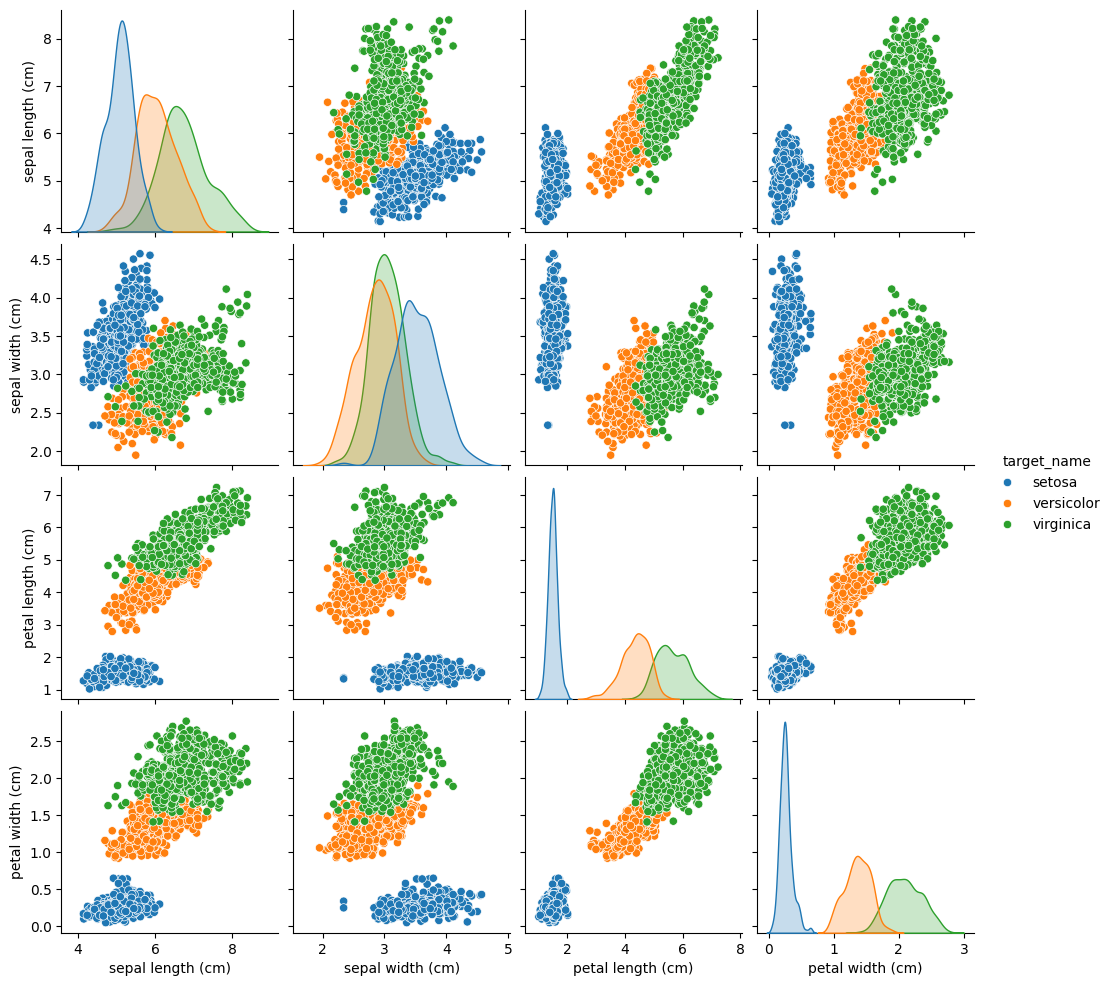

In [9]:
sns.pairplot( data=df, hue='target_name' )

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.955380,3.139507,3.840667,1.239953
std,0.853156,0.426284,1.793186,0.776807
min,4.140000,1.950000,1.020000,0.050000
25%,5.260000,2.850000,1.600000,0.310000
50%,5.910000,3.105000,4.395000,1.370000
75%,6.560000,3.392500,5.252500,1.890000
max,8.400000,4.570000,7.230000,2.770000


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

col_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
all_inputs = df[col_names].values
all_classes_strings = df['target_name'].values 

le = LabelEncoder()
all_classes_numeric = le.fit_transform(all_classes_strings)

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes_numeric, train_size=0.7, random_state=286123)

scaler = StandardScaler()
scaler.fit(train_inputs)
train_inputs = scaler.transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

print(train_classes)


[2 1 2 ... 2 2 0]


Train accuracy: 0.9771428571428571
Test accuracy: 0.9733333333333334
Predicted classes: [0 1 1 0 0 2 0 0 1 1 1 2 2 1 0 1 1 1 1 1 2 1 1 2 1 2 1 2 0 1 2 2 2 0 1 0 2
 1 1 1 1 0 2 0 1 2 2 2 2 2 0 2 2 1 1 2 2 2 1 0 0 0 1 2 2 1 1 2 0 0 2 1 2 1
 0 0 0 0 1 2 0 2 1 1 1 1 0 1 2 2 1 1 0 0 2 1 0 0 0 2 1 0 0 1 0 2 0 2 2 2 0
 0 2 2 1 0 1 0 1 1 1 2 1 2 0 0 1 1 2 2 0 0 2 0 2 1 1 0 1 1 2 0 0 0 0 0 2 1
 2 0 2 2 1 1 0 2 2 1 1 2 2 1 0 1 2 0 0 0 1 0 1 1 1 0 0 2 2 2 2 2 0 1 0 1 0
 1 2 1 1 0 2 1 1 2 1 1 0 0 1 1 0 2 1 2 1 1 1 0 2 1 2 2 2 0 0 1 0 1 2 2 2 1
 0 2 0 0 0 1 0 2 2 0 0 2 2 0 1 1 0 1 0 2 0 1 0 0 1 0 2 2 0 2 0 2 1 1 0 0 2
 2 1 1 0 0 2 1 0 1 0 2 1 1 0 1 2 0 1 2 0 1 2 0 0 2 0 1 0 1 1 0 0 0 0 0 1 2
 1 2 1 2 0 1 1 2 0 0 2 2 0 2 0 1 0 0 2 0 2 1 2 2 2 0 1 2 1 2 2 1 0 2 0 1 2
 1 0 1 2 0 0 1 2 2 1 0 1 2 2 2 1 1 0 0 2 0 0 2 2 1 2 0 2 0 1 2 2 2 2 0 1 1
 2 1 1 0 0 0 2 1 0 0 0 0 1 2 0 0 0 0 0 1 1 1 2 2 2 2 0 1 2 0 0 0 2 2 0 2 2
 2 0 0 1 2 2 2 2 1 1 1 1 1 2 2 0 1 1 1 1 1 0 1 1 2 2 1 1 2 2 0 2 2 2 2 2 0
 2 0 2 2 2 1

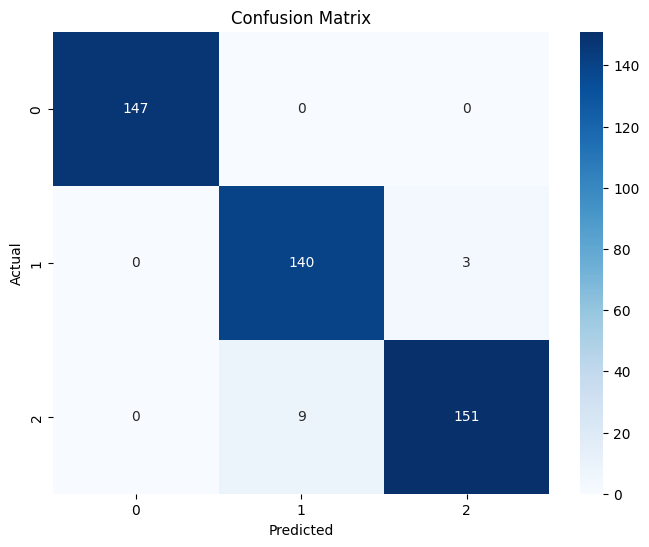

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#4-2-1
mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=1)
mlp.fit(train_inputs, train_classes)

predictions_train = mlp.predict(train_inputs)
print("Train accuracy:", metrics.accuracy_score(train_classes, predictions_train))
predictions_test = mlp.predict(test_inputs)
print("Test accuracy:", metrics.accuracy_score(test_classes, predictions_test))

prediction = mlp.predict(test_inputs)
print("Predicted classes:", prediction)
print("Actual classes:   ", test_classes)


Train accuracy: 0.9780952380952381
Test accuracy: 0.9733333333333334


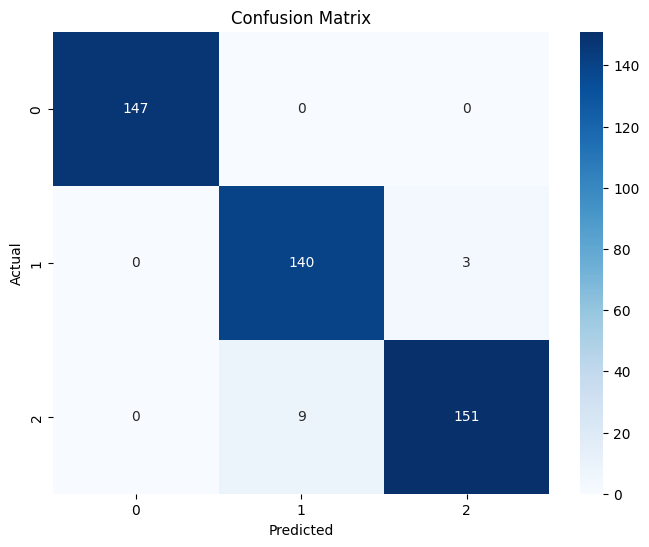

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# 4-3-1
mlp = MLPClassifier(hidden_layer_sizes=(3), max_iter=1000, random_state=1)
mlp.fit(train_inputs, train_classes)    

predictions_train = mlp.predict(train_inputs)
print("Train accuracy:", metrics.accuracy_score(train_classes, predictions_train))
predictions_test = mlp.predict(test_inputs)
print("Test accuracy:", metrics.accuracy_score(test_classes, predictions_test))

cm_nb = confusion_matrix(test_classes, predictions_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

Train accuracy: 0.9771428571428571
Test accuracy: 0.9755555555555555


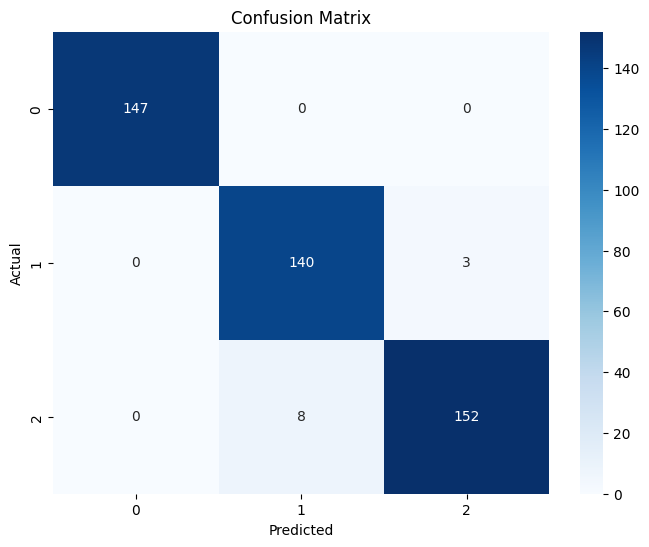

In [ ]:

# 4-3-3-1
mlp = MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000, random_state=1)
mlp.fit(train_inputs, train_classes)
predictions_train = mlp.predict(train_inputs)
print("Train accuracy:", metrics.accuracy_score(train_classes, predictions_train))
predictions_test = mlp.predict(test_inputs)
print("Test accuracy:", metrics.accuracy_score(test_classes, predictions_test))
cm_nb = confusion_matrix(test_classes, predictions_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()